## Compare to supercloud

This notebook was used to compare the current set of ai-ready data to the previously used training data to see if there were differences in the alignment due to the processing pipeline.

In [2]:
import geopandas as gpd
from shapely.geometry import box
import rioxarray as rxr
import numpy as np
import matplotlib.pyplot as plt
import richdem as rd
import dask.array as da
from shapely.geometry import Polygon
from pyproj import CRS, Transformer

In [4]:
# Paths to the data
local_data_path = "/Users/tthomas/Desktop/ESS569/MLGEO2024_MarsFans/data/ai_ready/"
supercloud_data_path = "/Users/tthomas/Desktop/ESS569/MLGEO2024_MarsFans/data/FirstTraining_supercloud_images/"

# Open local images
local_blendDEM = rxr.open_rasterio(local_data_path + "blendDEM_aiready.tif", cache=False)
local_blendSLOPE = rxr.open_rasterio(local_data_path + "blendSLOPE_aiready.tif", cache=False)
local_ctxDEM = rxr.open_rasterio(local_data_path + "ctxDEM_aiready.tif", cache=False)
local_ctxIMG = rxr.open_rasterio(local_data_path + "ctxIMG_aiready.tif", cache=False)
local_ctxSLOPE = rxr.open_rasterio(local_data_path + "ctxSLOPE_aiready.tif", cache=False)
local_dayIR = rxr.open_rasterio(local_data_path + "dayIR_aiready.tif", cache=False)
local_nightIR = rxr.open_rasterio(local_data_path + "nightIR_aiready.tif", cache=False)
local_hrscND = rxr.open_rasterio(local_data_path + "hrscND_aiready.tif", cache=False)
local_hrscP1 = rxr.open_rasterio(local_data_path + "hrscP1_aiready.tif", cache=False)
local_hrscP2 = rxr.open_rasterio(local_data_path + "hrscP2_aiready.tif", cache=False)
local_hrscS1 = rxr.open_rasterio(local_data_path + "hrscS1_aiready.tif", cache=False)
local_hrscS2 = rxr.open_rasterio(local_data_path + "hrscS2_aiready.tif", cache=False)

training_imgs_local = [local_blendDEM, local_blendSLOPE, local_ctxDEM, local_ctxIMG, local_ctxSLOPE, local_dayIR, local_nightIR, local_hrscND, local_hrscP1, local_hrscP2, local_hrscS1, local_hrscS2]
training_names = ['blendDEM', 'blendSLOPE', 'ctxDEM', 'ctxIMG', 'ctxSLOPE', 'dayIR', 'nightIR', 'hrscND', 'hrscP1', 'hrscP2', 'hrscS1', 'hrscS2']

# Open supercloud images
supercloud_blendDEM = rxr.open_rasterio(supercloud_data_path + "blendDEM.tif", cache=False)
supercloud_blendSLOPE = rxr.open_rasterio(supercloud_data_path + "blendSLOPE.tif", cache=False)
supercloud_ctxDEM = rxr.open_rasterio(supercloud_data_path + "ctxDEM.tif", cache=False)
supercloud_ctxIMG = rxr.open_rasterio(supercloud_data_path + "ctxIMG.tif", cache=False)
supercloud_ctxSLOPE = rxr.open_rasterio(supercloud_data_path + "ctxSLOPE.tif", cache=False)
supercloud_dayIR = rxr.open_rasterio(supercloud_data_path + "dayIR.tif", cache=False)
supercloud_nightIR = rxr.open_rasterio(supercloud_data_path + "nightIR.tif", cache=False)
supercloud_hrscND = rxr.open_rasterio(supercloud_data_path + "hrscND.tif", cache=False)
supercloud_hrscP1 = rxr.open_rasterio(supercloud_data_path + "hrscP1.tif", cache=False)
supercloud_hrscP2 = rxr.open_rasterio(supercloud_data_path + "hrscP2.tif", cache=False)
supercloud_hrscS1 = rxr.open_rasterio(supercloud_data_path + "hrscS1.tif", cache=False)
supercloud_hrscS2 = rxr.open_rasterio(supercloud_data_path + "hrscS2.tif", cache=False)

training_imgs_supercloud = [supercloud_blendDEM, supercloud_blendSLOPE, supercloud_ctxDEM, supercloud_ctxIMG, supercloud_ctxSLOPE, supercloud_dayIR, supercloud_nightIR, supercloud_hrscND, supercloud_hrscP1, supercloud_hrscP2, supercloud_hrscS1, supercloud_hrscS2]


In [20]:
def quick_plot(data, title=None):
    # Function that quickly plots and image and value histogram

    # Remove NaN values for the histogram
    data_values = data.values.flatten()
    data_values = data_values[~np.isnan(data_values)]
    data_values = data_values[~np.isinf(data_values)]

    # Create the histogram
    n, bins = np.histogram(data_values, bins=50)

    # Create a figure with two subplots
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    # Plot the histogram
    ax[1].stairs(n, bins)
    ax[1].set_title(f"{title} Histogram")
    ax[1].set_xlabel("Value")
    ax[1].set_ylabel("Frequency")

    # Plot the reprojected DEM image
    data.plot(ax=ax[0])
    ax[0].set_title(title)

    # Adjust layout
    plt.tight_layout()
    plt.show()

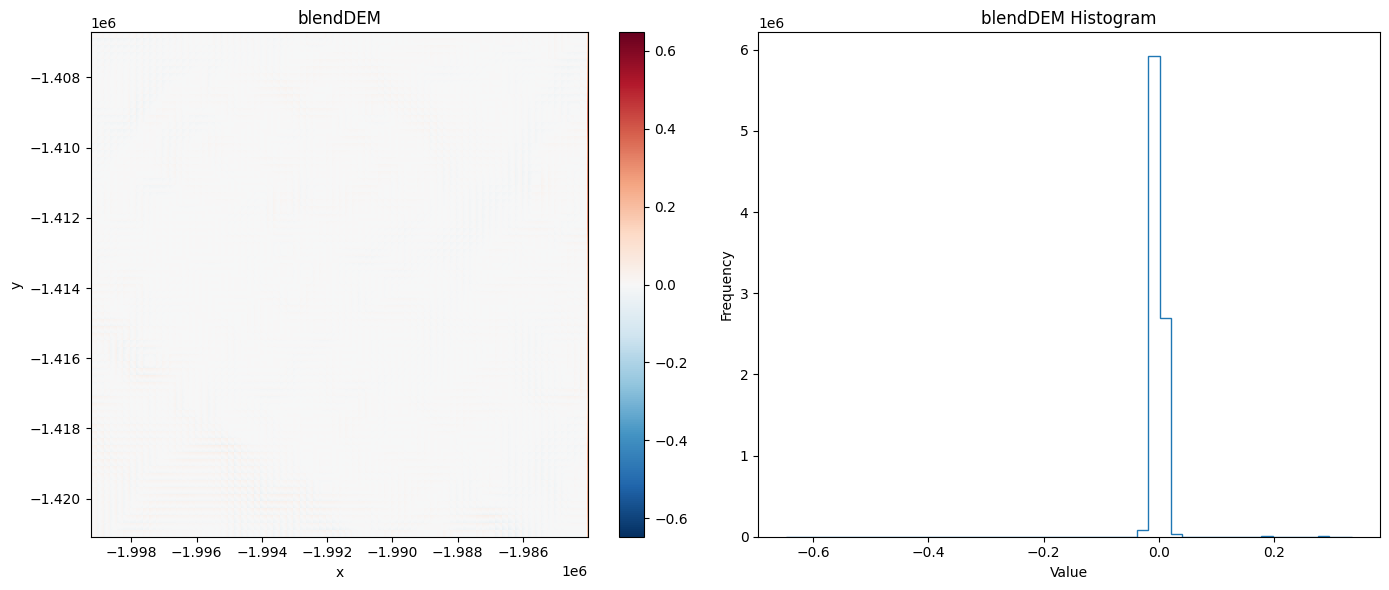

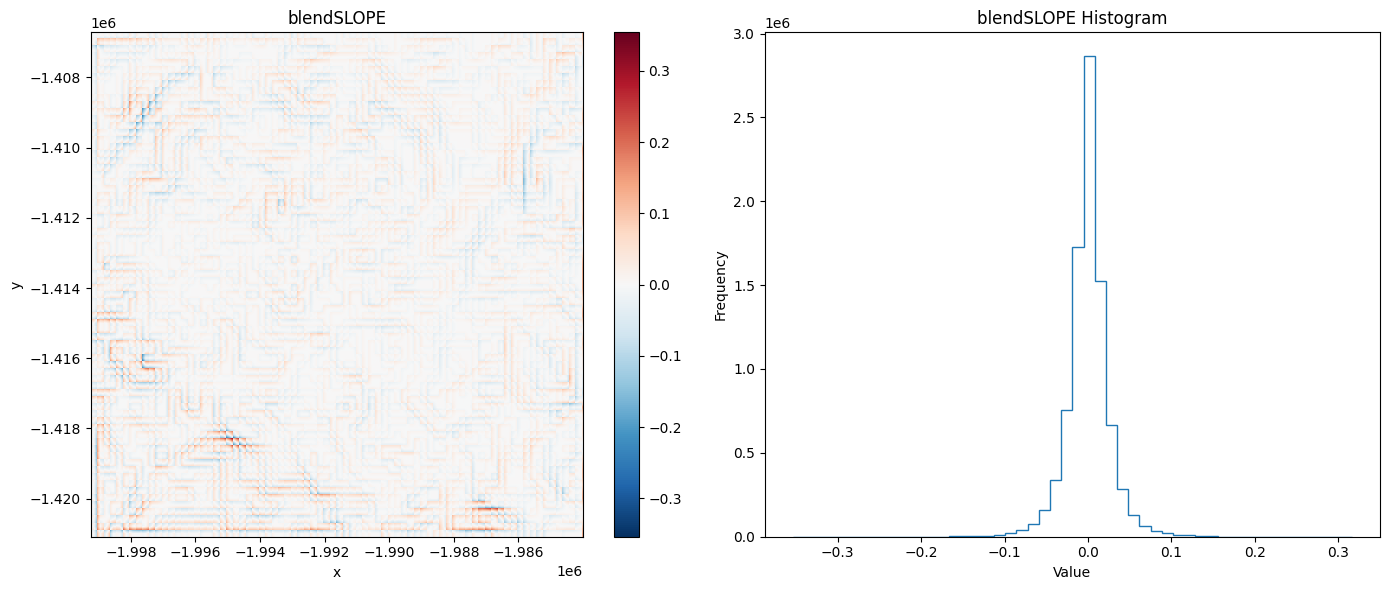

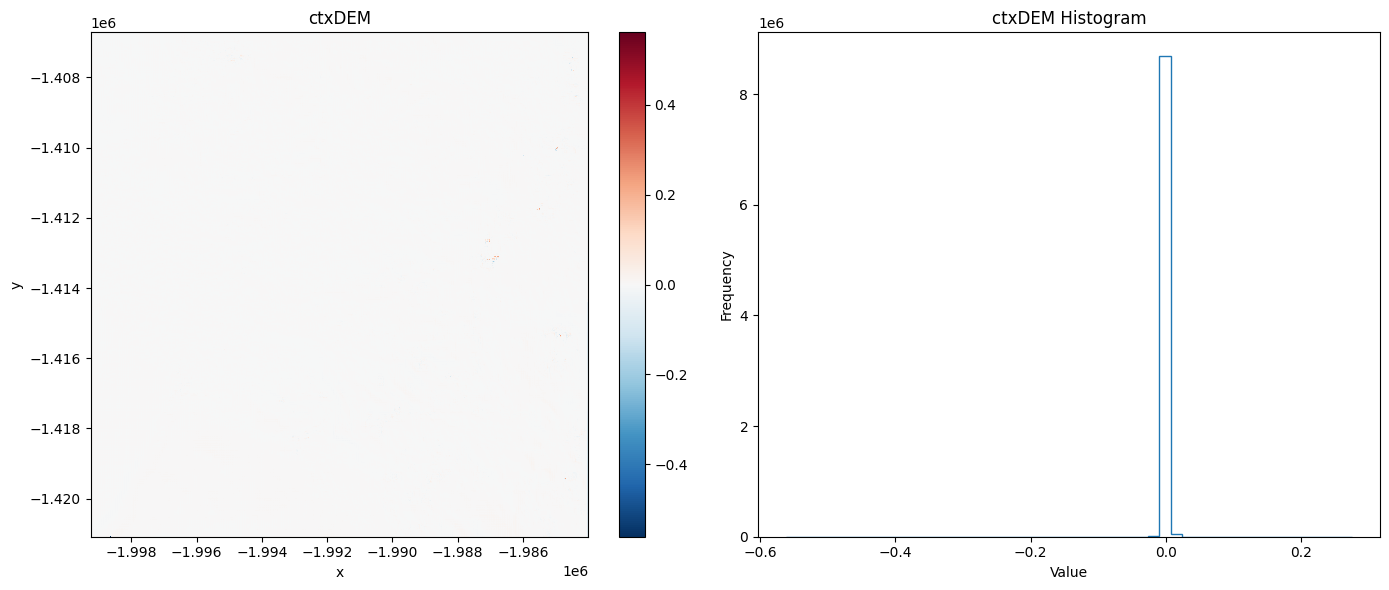

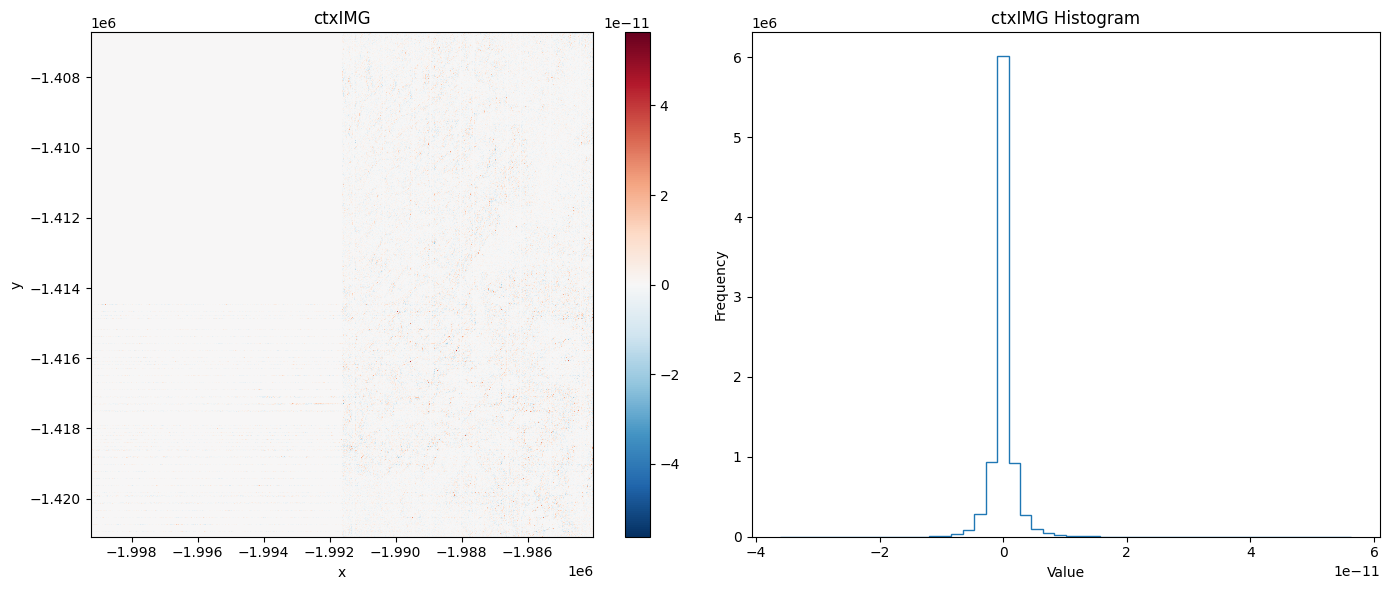

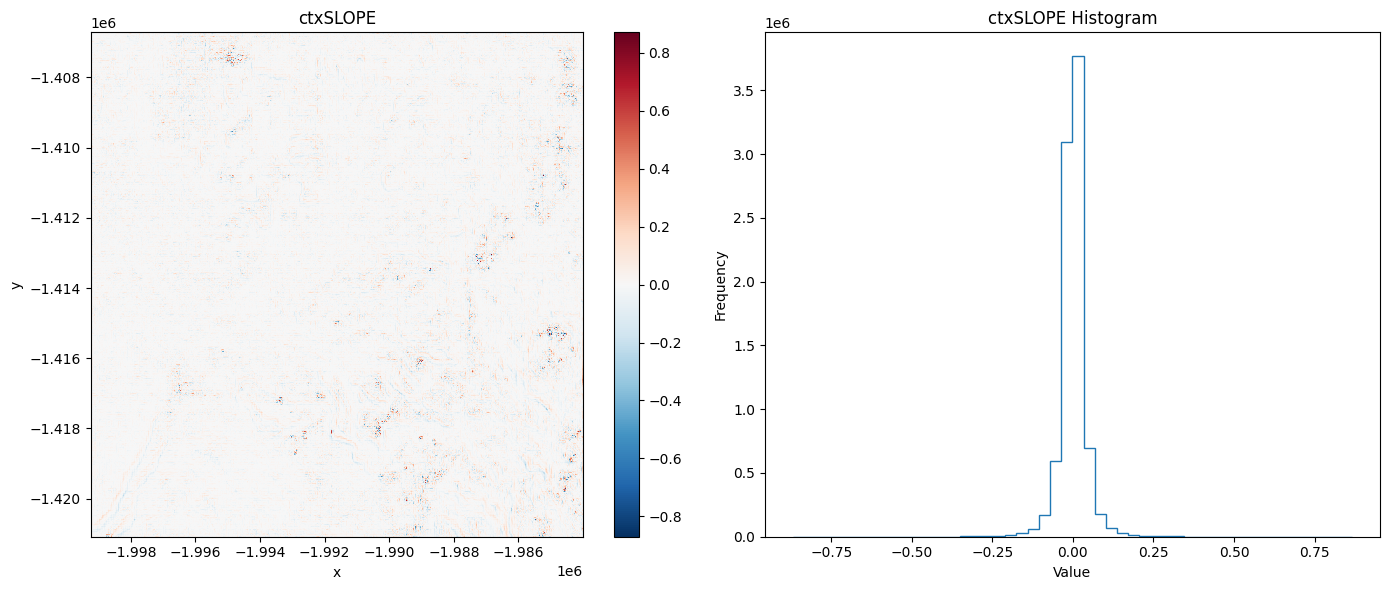

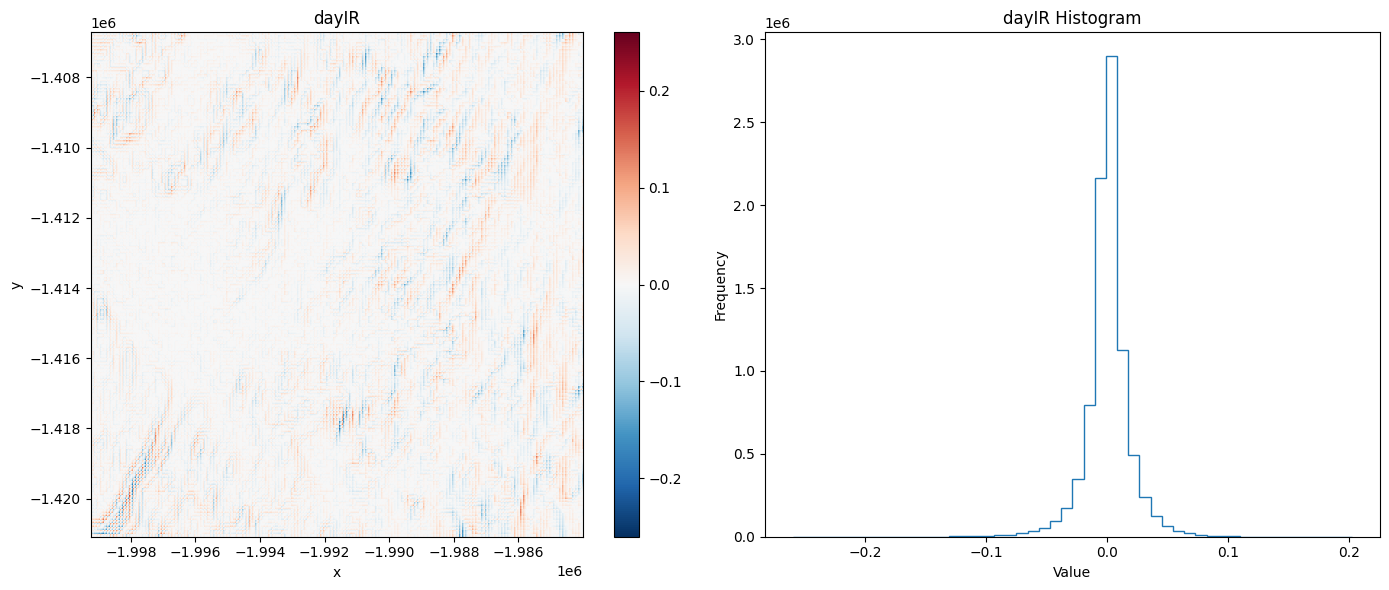

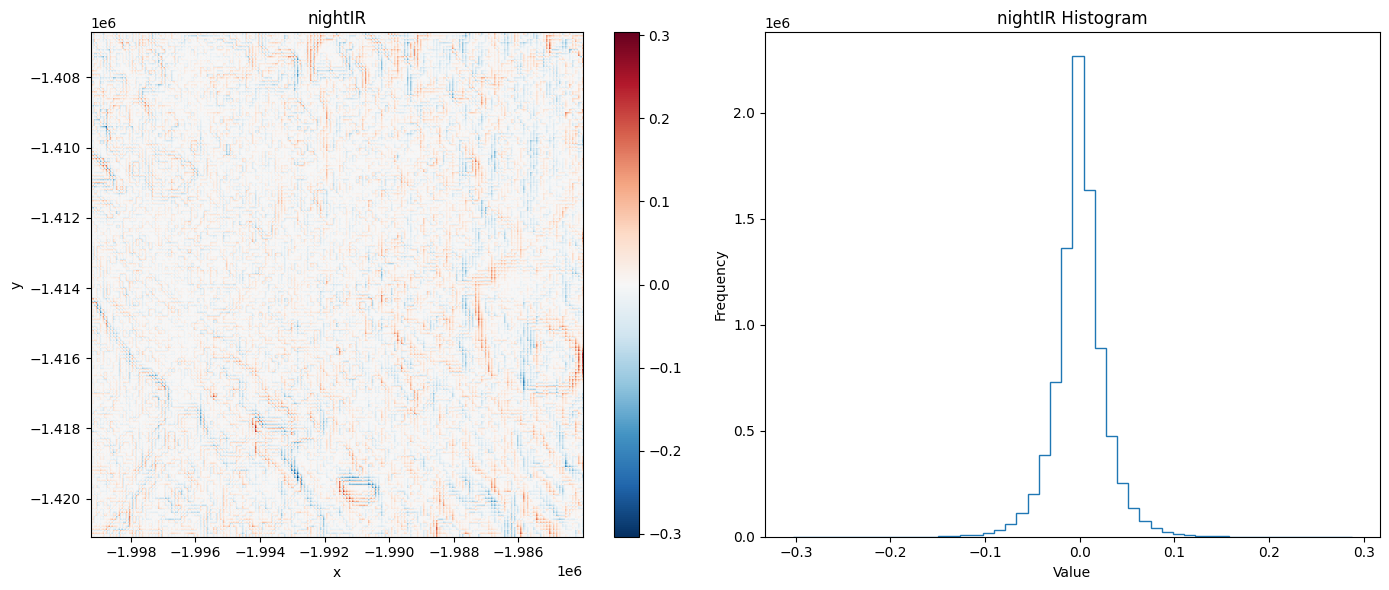

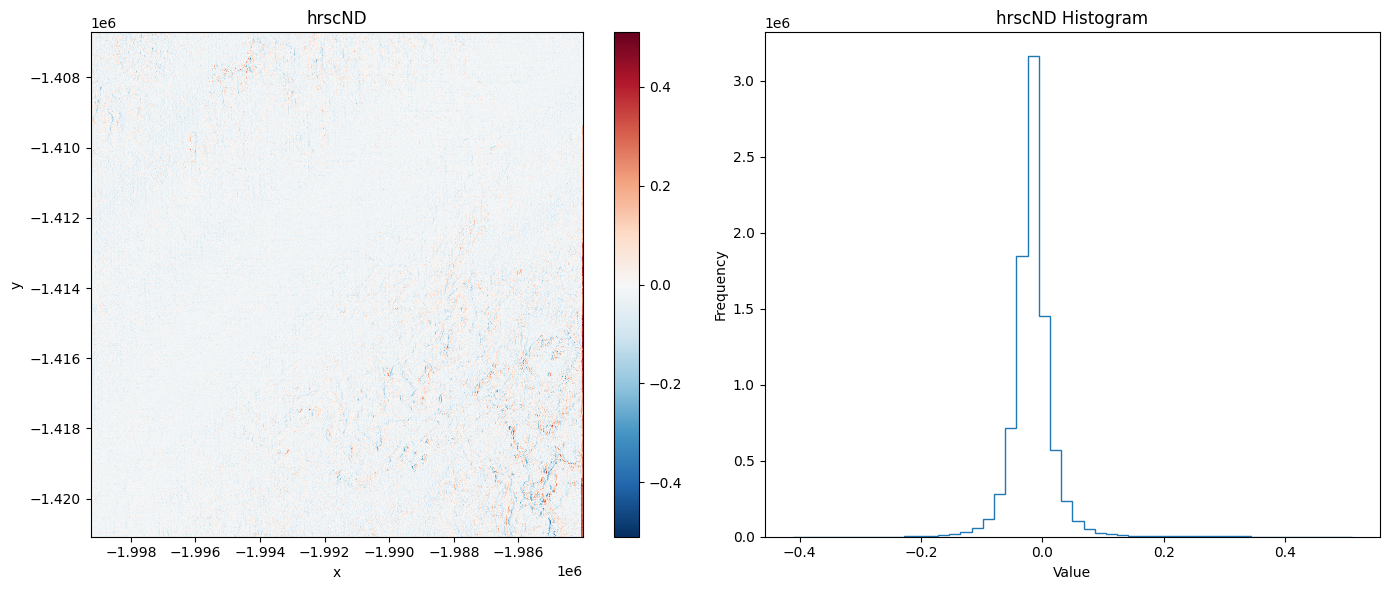

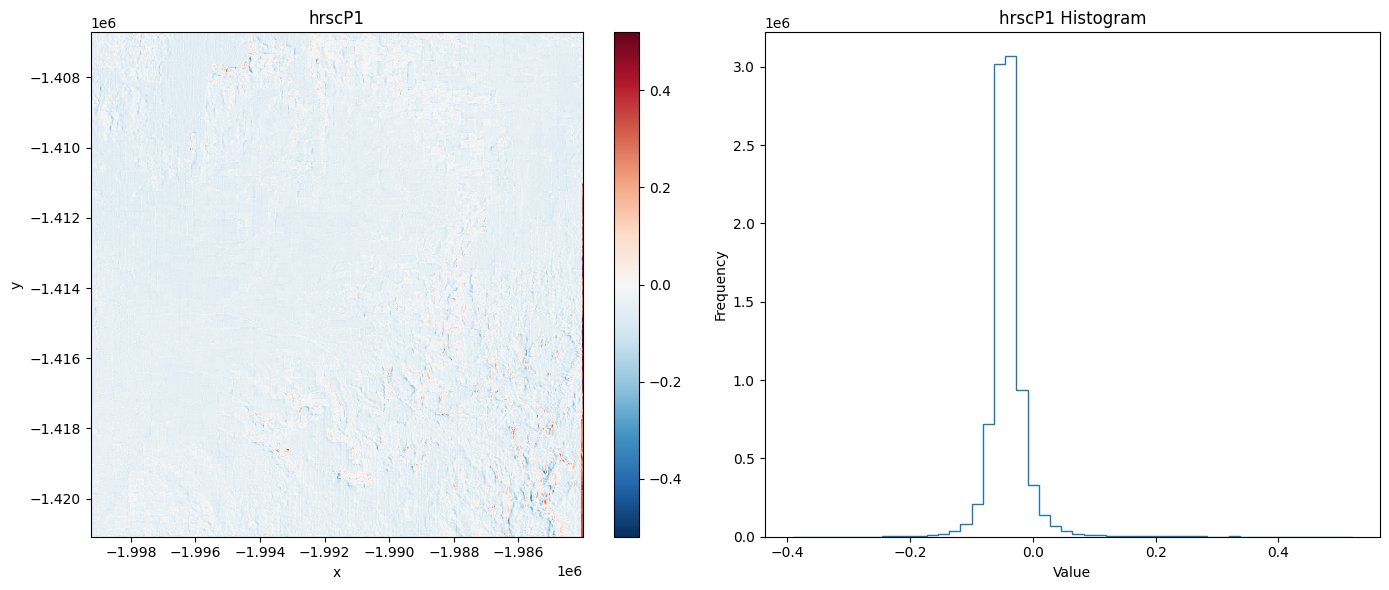

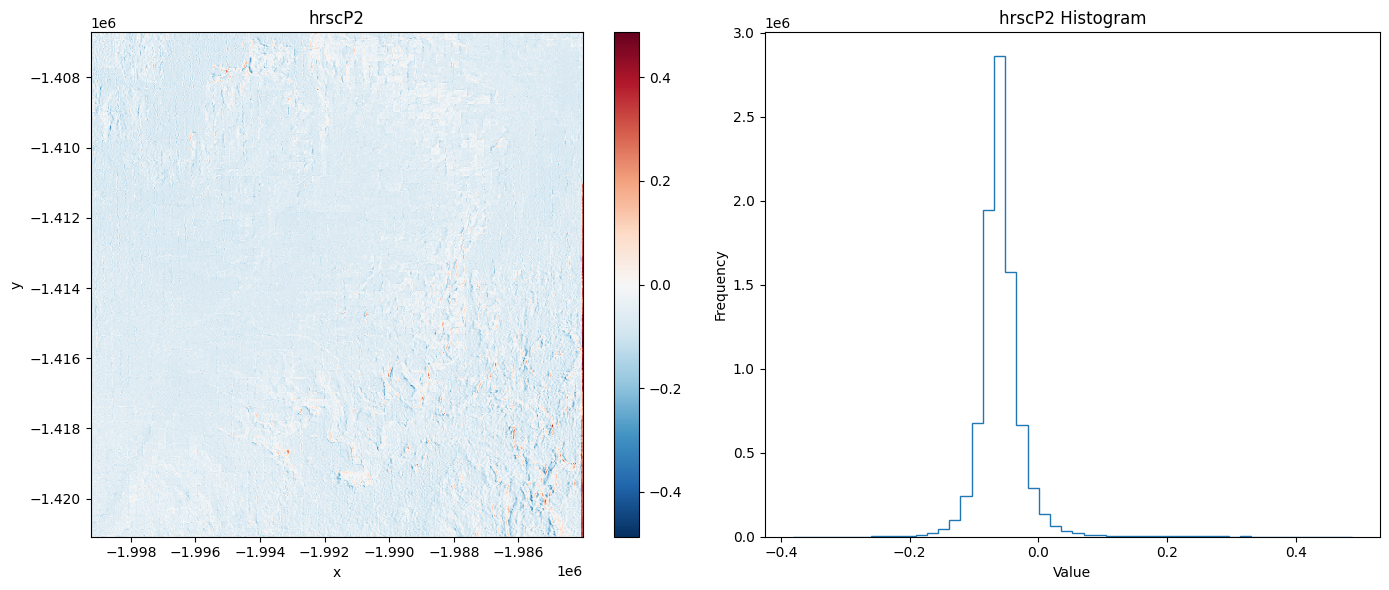

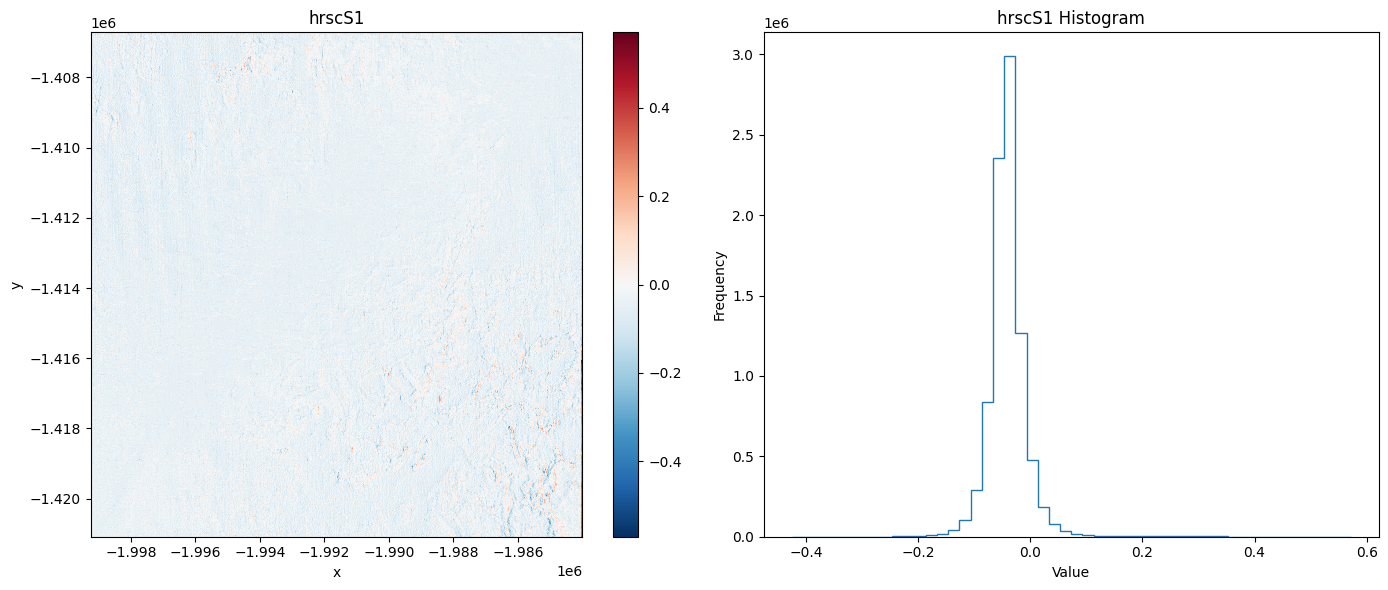

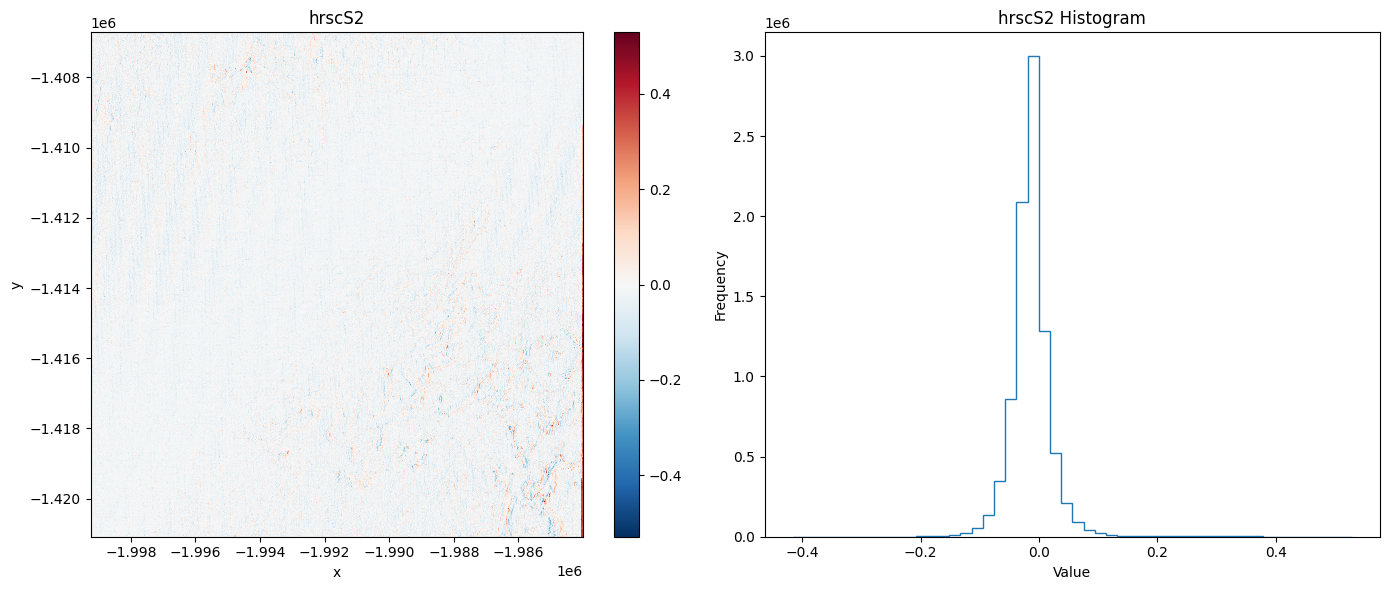

In [23]:
# Function to subtract images and plot the result
def subtract_and_plot_images(supercloud_img, local_img, title):
    # Subtract the local image from the supercloud image
    difference = supercloud_img.values - local_img.values
    
    new = supercloud_img.copy()
    new.values = difference 
    
    # Plot the difference
    quick_plot(new, title=title)

# Overlay corresponding images
subtract_and_plot_images(supercloud_blendDEM, local_blendDEM, 'blendDEM')
subtract_and_plot_images(supercloud_blendSLOPE, local_blendSLOPE, 'blendSLOPE')
subtract_and_plot_images(supercloud_ctxDEM, local_ctxDEM, 'ctxDEM')
subtract_and_plot_images(supercloud_ctxIMG, local_ctxIMG, 'ctxIMG')
subtract_and_plot_images(supercloud_ctxSLOPE, local_ctxSLOPE, 'ctxSLOPE')
subtract_and_plot_images(supercloud_dayIR, local_dayIR, 'dayIR')
subtract_and_plot_images(supercloud_nightIR, local_nightIR, 'nightIR')
subtract_and_plot_images(supercloud_hrscND, local_hrscND, 'hrscND')
subtract_and_plot_images(supercloud_hrscP1, local_hrscP1, 'hrscP1')
subtract_and_plot_images(supercloud_hrscP2, local_hrscP2, 'hrscP2')
subtract_and_plot_images(supercloud_hrscS1, local_hrscS1, 'hrscS1')
subtract_and_plot_images(supercloud_hrscS2, local_hrscS2, 'hrscS2')


In [5]:

local_ctxIMG

<xarray.DataArray (band: 1, y: 2873, x: 3048)> Size: 70MB
[8756904 values with dtype=float64]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 24kB -1.999e+06 -1.999e+06 ... -1.984e+06
  * y            (y) float64 23kB -1.407e+06 -1.407e+06 ... -1.421e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     1.7976931348623157e+308
    scale_factor:   1.0
    add_offset:     0.0

In [6]:
supercloud_ctxIMG

<xarray.DataArray (band: 1, y: 2873, x: 3048)> Size: 70MB
[8756904 values with dtype=float64]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 24kB -1.999e+06 -1.999e+06 ... -1.984e+06
  * y            (y) float64 23kB -1.407e+06 -1.407e+06 ... -1.421e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     0.0
    scale_factor:   1.0
    add_offset:     0.0